<a href="https://colab.research.google.com/github/Mohith06/Mount-Sinai/blob/main/MountSinaiTrial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# use this link for uploading from drive
#https://www.youtube.com/watch?v=woHxvbBLarQ

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Load and concatenate data
path1 = "/content/drive/MyDrive/research/SAVE_Status_Baseline.csv"
path2 = "/content/drive/MyDrive/research/SAVE_primary_adj.csv"

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df = pd.concat([df1, df2], axis=0)

# Drop rows with missing target values
df = df.dropna(subset=['MINB'])

# Define features and target variable
X = df[['ITMCALEPW10_1', 'AGE_RAND', 'ITMSEX_1', 'ITMRACE_C', 'SITECOUNTRY', 'BAS_NECK', 'BAS_WAIST_HIP', 'BAS_BMI']]
y = df['MINB']

# Handle categorical variables
X = pd.get_dummies(X, columns=['ITMSEX_1', 'ITMRACE_C', 'SITECOUNTRY'], drop_first=True)

# Handle missing values
X = X.fillna(X.median())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display first few predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df.head())
'''




#Mohith Code, try later:



# Step 2: Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Load your dataset
path1 = "/content/drive/MyDrive/Research/SAVE_Status_Baseline.csv"
path2 = "/content/drive/MyDrive/Research/SAVE_primary_adj.csv"

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

# Step 2: Combine datasets if needed
df = pd.concat([df1, df2], axis=0)

# Step 1: Identify columns with all NaN values
columns_with_all_missing = df.columns[df.isna().all()]
print(f"Columns with all missing values: {columns_with_all_missing.tolist()}")

# Step 2: Drop columns with all missing values
df = df.drop(columns=columns_with_all_missing)
df['ITMSEX_1'] = df['ITMSEX_1'].map({'Male': -1, 'Female': 1})



# Step 3: Define your features (X) and target (y)
# Define features and target variable

X = df[['ITMCALEPW10_1', 'AGE_RAND', 'ITMSEX_1', 'ITMRACE_C', 'SITECOUNTRY', 'BAS_NECK', 'BAS_WAIST_HIP', 'BAS_BMI']]
y = df['MINB']

# Handle categorical features with one-hot encoding
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = ohe.fit_transform(X[['ITMRACE_C', 'SITECOUNTRY']])
X_encoded_df = pd.DataFrame(X_encoded, columns=ohe.get_feature_names_out(['ITMRACE_C', 'SITECOUNTRY']))
X = pd.concat([X.drop(['ITMRACE_C', 'SITECOUNTRY'], axis=1), X_encoded_df], axis=1)


# Step 2: Handle missing values before splitting the data
imputer = SimpleImputer(strategy='mean')  # You can change the strategy if needed
X_imputed = imputer.fit_transform(X)

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 4: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Check for NaN or infinite values
print(f"NaN values in X_train_scaled before handling: {np.isnan(X_train_scaled).sum()}")
print(f"Infinite values in X_train_scaled before handling: {np.isinf(X_train_scaled).sum()}")

# Step 6: Handle NaN or infinite values (if any)
X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=0.0, neginf=0.0)
X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0, posinf=0.0, neginf=0.0)

print(f"NaN values in X_train_scaled after handling: {np.isnan(X_train_scaled).sum()}")
print(f"Infinite values in X_train_scaled after handling: {np.isinf(X_train_scaled).sum()}")

# Step 7: Train the regression model
model = LinearRegression()
try:
    model.fit(X_train_scaled, y_train)
except ValueError as e:
    print(f"Error during model fitting: {e}")

# Step 8: If model training fails, inspect data
if np.isnan(X_train_scaled).any() or np.isinf(X_train_scaled).any():
    print("There are still NaN or infinite values in X_train_scaled.")
    # Handle this scenario accordingly, e.g., further data cleaning or debugging.
else:
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    print("Model trained and predictions made successfully.")

# Step 9: Train the regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 10: Predict on the test set
y_pred = model.predict(X_test_scaled)

# Step 11: Evaluate the model (Example: using R-squared)
r_squared = model.score(X_test_scaled, y_test)
print(f"R-squared: {r_squared}")

# Additional steps like calculating metrics or plotting can be added here


# Step 12: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 13: Print evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 14: Display first few predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df.head())

# Step 15: Plotting results (Optional)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()


Columns with all missing values: []


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load your dataset
path1 = "/content/drive/MyDrive/Research/SAVE_Status_Baseline.csv"
path2 = "/content/drive/MyDrive/Research/SAVE_primary_adj.csv"

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

# Step 2: Combine datasets if needed
df = pd.concat([df1, df2], axis=0)
df = df[df['ITMFRANDGRP_C'] == 1]

# Identify and drop columns with all NaN values
columns_with_all_missing = df.columns[df.isna().all()]
print(f"Columns with all missing values: {columns_with_all_missing.tolist()}")
df = df.drop(columns=columns_with_all_missing)

df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Convert categorical variables to numerical values
df['ITMSEX_1'] = df['ITMSEX_1'].map({'Male': -1, 'Female': 1})

# Define features and target variable
X = df[['ITMCALEPW10_1', 'AGE_RAND', 'ITMSEX_1', 'BAS_BMI']]
y = df['ITMAPHI_1']

# Step 4: Handle missing data
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 10: Plot the results
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Research/SAVE_Status_Baseline.csv'

DataFrame shape before filtering: (1346, 97)
ITMAPHI_1       0
MINB         1346
dtype: int64
Data after filling NaNs:
     ITMAPHI_1  MINB
0        84.0   0.0
2        34.0   0.0
5        15.0   0.0
8        67.0   0.0
12       62.0   0.0


<ipython-input-12-54f84ccbeb43>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['MINB'] = df_plot['MINB'].fillna(0)
<ipython-input-12-54f84ccbeb43>:42: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim([df_plot['MINB'].min(), df_plot['MINB'].max()])


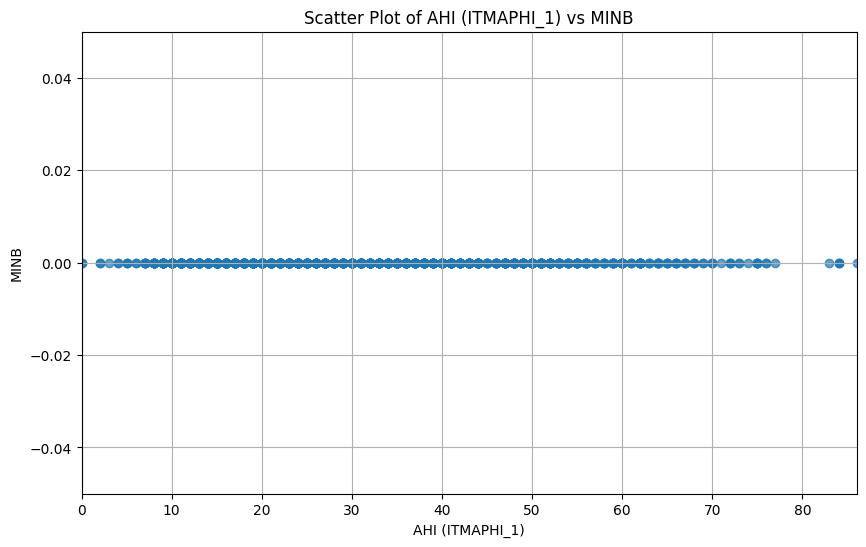

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
path1 = "/content/drive/MyDrive/Research/SAVE_Status_Baseline.csv"
path2 = "/content/drive/MyDrive/Research/SAVE_primary_adj.csv"

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

# Combine datasets
df = pd.concat([df1, df2], axis=0)

# Filter the data based on the relevant condition
df = df[df['ITMFRANDGRP_C'] == 1]

# Print the shape and missing values information
print("DataFrame shape before filtering:", df.shape)
print(df[['ITMAPHI_1', 'MINB']].isnull().sum())  # Check for NaNs in these columns

# Data preprocessing for the two selected variables
if 'ITMAPHI_1' in df.columns and 'MINB' in df.columns:
    # Create a new DataFrame with both variables
    df_plot = df[['ITMAPHI_1', 'MINB']]

    # Fill NaN values in MINB with 0
    df_plot['MINB'] = df_plot['MINB'].fillna(0)

    # After filling NaNs, check the DataFrame
    print("Data after filling NaNs:\n", df_plot.head())  # Inspect first few rows

    # Plotting the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df_plot['ITMAPHI_1'], df_plot['MINB'], alpha=0.7)
    plt.title('Scatter Plot of AHI (ITMAPHI_1) vs MINB')
    plt.xlabel('AHI (ITMAPHI_1)')
    plt.ylabel('MINB')

    # Set x and y limits safely
    plt.xlim([df_plot['ITMAPHI_1'].min(), df_plot['ITMAPHI_1'].max()])
    plt.ylim([df_plot['MINB'].min(), df_plot['MINB'].max()])

    plt.grid()
    plt.show()
else:
    print("Required columns 'ITMAPHI_1' or 'MINB' are not present in the DataFrame.")